In [3]:
import numpy as py
import pandas as pd
import re
import nltk
from nltk import word_tokenize
from nltk import FreqDist
#nltk.download('stopwords') 
  
# to remove stopword 
from nltk.corpus import stopwords 
  
# for Stemming propose  
from nltk.stem.porter import PorterStemmer 

import matplotlib.pyplot as plt

from wordcloud import WordCloud
from PIL import Image

In [4]:
df=pd.read_excel("sami.xlsx")
df.head()

,TICKET,NOMBRE_SISTEMA,USUARIO QUE REPORTA,NOMBRE DEL TICKET,DESCRIPCIÓN DETALLADA DEL TICKET,CLASIFICACIÓN,ESTATUS,TURNADO A,FECHA DE REGISTRO,FECHA ATENCIÓN,ÁREA SOLICITANTE
0,I-05-AP-181210-1108,Nuevo Sistema de Bases de Datos de Bienes,Elvia,No se visualiza documentación complementaria,​El usuario Oficialia1 Bajio personal de tdr s...,Incidente,Cerrado,LUIS IGNACIO RENTERIA HERNANDEZ,2018-12-10,NaT,DIRECCION EJECUTIVA DE ADMINISTRACION DE EMPRE...
1,I-05-AP-181210-1559,Nuevo Sistema de Bases de Datos de Bienes,NaN,Error al adjuntar dictamen en el NSBDB,​El usuario reporta que continua con el error ...,Incidente,Atendido,JOSE ANTONIO CERON GOMEZ,2018-12-10,2019-05-07,DIRECCION EJECUTIVA DE COORDINACION REGIONAL O...
2,I-05-AP-181210-1605,Nuevo Sistema de Bases de Datos de Bienes,NaN,No se reflejan transferencias en SIAB.,​El usuario solicita apoyo debido a que los in...,Incidente,Cerrado,LUIS IGNACIO RENTERIA HERNANDEZ,2018-12-10,NaT,DIRECCION EJECUTIVA DE COORDINACION REGIONAL ESTE
3,I-05-AP-181210-1122,Nuevo Sistema de Bases de Datos de Bienes,NaN,DOCUMENTOS DAÑADOS NSBDB,​El usuario solicita apoyo para poder visualiz...,Incidente,Cerrado,JOSE ANTONIO CERON GOMEZ,2018-12-10,2008-12-10,DIRECCION EJECUTIVA DE COORDINACION REGIONAL O...
4,S-05-AP-181210-1802,Nuevo Sistema de Bases de Datos de Bienes,NaN,"NSBDB-BPM: DR Baja California, solicitudes sin...",​El usuario solicita apoyo a efecto de verific...,Solicitud,Atendido,,2018-12-11,2018-12-12,DIRECCION EJECUTIVA DE COORDINACION REGIONAL ESTE


In [6]:
#take only the columns we are interested
data=df[['TICKET','NOMBRE DEL TICKET']]
#data['TEXTO LIMPIO']='1'
data.head()

,TICKET,NOMBRE DEL TICKET
0,I-05-AP-181210-1108,No se visualiza documentación complementaria
1,I-05-AP-181210-1559,Error al adjuntar dictamen en el NSBDB
2,I-05-AP-181210-1605,No se reflejan transferencias en SIAB.
3,I-05-AP-181210-1122,DOCUMENTOS DAÑADOS NSBDB
4,S-05-AP-181210-1802,"NSBDB-BPM: DR Baja California, solicitudes sin..."


In [9]:
corpus=''
for text in data['NOMBRE DEL TICKET']:
    corpus=corpus + ' ' + str(text) + ' '
    
print (corpus)

 No se visualiza documentación complementaria  Error al adjuntar dictamen en el NSBDB  No se reflejan transferencias en SIAB.  DOCUMENTOS DAÑADOS NSBDB  NSBDB-BPM: DR Baja California, solicitudes sin documentación anexa  Nombre de la transferente distinto  Se solicita apoyo para modificar fecha en programación para recepción SAMI  Bienes Repetidos en tablas de Bajada  nan  No se reflejan transferencias en SIAB.   NSBDB- BPM PROGRAMAR ENTREGAS POR VENTA DR NORTE  Cancelación de bien proveniente de BPM y duplicado en SIAB  SOLICITUD DE APOYO- OFICIOS DE TRANSFERENCIA PENDIENTE DE REFLEJARSE  NSBDB NO HAY USUARIOS A TURNAR DR BAJIO  APOYO PARA MODIFICAR FECHA  APOYO PARA PROGRAMAR  Solicitud de apoyo para localizar oficios de la Adace Norte Centro  Solicitudes  de transferencia que no se encuentran en el BMP  Oficio de solicitud de transferencia dañado / no visible.  Solicitudes sin atender  Apoyo en Dispersión de lotes LPBI 09/18  BIENES DUPLICADOS Y TRIPLICADOS  QUE PASAN DE LA NSBDDB A

In [10]:
words=word_tokenize(corpus)
print (len(words))
print(words)

9306
['No', 'se', 'visualiza', 'documentación', 'complementaria', 'Error', 'al', 'adjuntar', 'dictamen', 'en', 'el', 'NSBDB', 'No', 'se', 'reflejan', 'transferencias', 'en', 'SIAB', '.', 'DOCUMENTOS', 'DAÑADOS', 'NSBDB', 'NSBDB-BPM', ':', 'DR', 'Baja', 'California', ',', 'solicitudes', 'sin', 'documentación', 'anexa', 'Nombre', 'de', 'la', 'transferente', 'distinto', 'Se', 'solicita', 'apoyo', 'para', 'modificar', 'fecha', 'en', 'programación', 'para', 'recepción', 'SAMI', 'Bienes', 'Repetidos', 'en', 'tablas', 'de', 'Bajada', 'nan', 'No', 'se', 'reflejan', 'transferencias', 'en', 'SIAB', '.', 'NSBDB-', 'BPM', 'PROGRAMAR', 'ENTREGAS', 'POR', 'VENTA', 'DR', 'NORTE', 'Cancelación', 'de', 'bien', 'proveniente', 'de', 'BPM', 'y', 'duplicado', 'en', 'SIAB', 'SOLICITUD', 'DE', 'APOYO-', 'OFICIOS', 'DE', 'TRANSFERENCIA', 'PENDIENTE', 'DE', 'REFLEJARSE', 'NSBDB', 'NO', 'HAY', 'USUARIOS', 'A', 'TURNAR', 'DR', 'BAJIO', 'APOYO', 'PARA', 'MODIFICAR', 'FECHA', 'APOYO', 'PARA', 'PROGRAMAR', 'Solicit

In [11]:
fdist=FreqDist(words)
fdist.most_common(10)

[('de', 495),
 ('DE', 474),
 ('en', 197),
 ('EN', 179),
 ('SAMI', 177),
 ('NSBDB', 153),
 ('BIENES', 147),
 ('NO', 128),
 ('APOYO', 122),
 ('.', 121)]

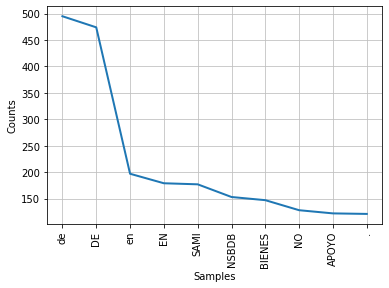

In [12]:
fdist.plot(10)

In [13]:
#REMOVE PUNCTUATIONS
words_no_punc=[]
for w in words:
    if w.isalpha():
        words_no_punc.append(w.lower())
        
#print (words_no_punc)
#print ('\n')
print (len(words_no_punc))

8344


In [14]:
fdist=FreqDist(words_no_punc)
fdist.most_common(10)

[('de', 969),
 ('en', 376),
 ('solicitud', 257),
 ('apoyo', 237),
 ('bienes', 237),
 ('para', 233),
 ('no', 206),
 ('sami', 184),
 ('se', 178),
 ('nsbdb', 157)]

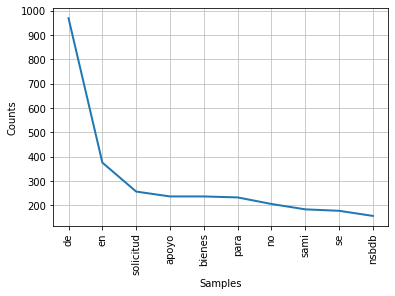

In [15]:
fdist.plot(10)

In [16]:
#REMOVE STOPWORDS
stopwords=stopwords.words('spanish')
#stopwords.append(['usuario'])
print(stopwords)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [17]:
clean_words=[]

for w in words_no_punc:
    if w not in stopwords:
        clean_words.append(w)

print (len(clean_words))

5533


In [18]:
fdist=FreqDist(clean_words)
fdist.most_common(10)

[('solicitud', 257),
 ('apoyo', 237),
 ('bienes', 237),
 ('sami', 184),
 ('nsbdb', 157),
 ('error', 152),
 ('cambio', 124),
 ('programación', 116),
 ('sistema', 113),
 ('siab', 106)]

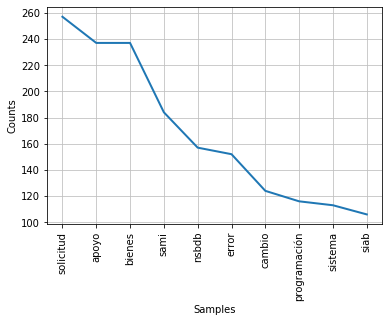

In [19]:
fdist.plot(10)

In [20]:
def converttostr(input_seq, seperator):
   # Join all the strings in list
   final_str = seperator.join(input_seq)
   return final_str

In [21]:
seperator = ' '
text_str= converttostr(clean_words, seperator)

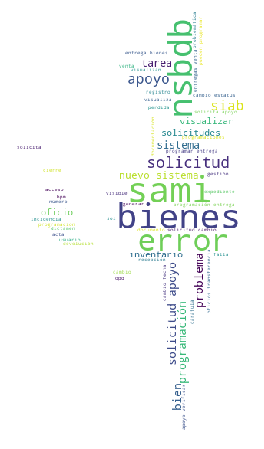

In [22]:
#WE´LL USE THE CIRCLE IMAGE 
char_mask=py.array(Image.open('Calista.png'))

#GENERATE THE WORDCLOUD
wordcloud=WordCloud(background_color='white', mask=char_mask).generate(text_str)

#PLOT THE CLOUD
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)

#remove the axis
plt.axis('off')
plt.show()

In [23]:
#STEMMING WORDS
from nltk.stem import PorterStemmer

porter=PorterStemmer()

#word list
word_list=['study','studying','studies','studied']

for w in word_list:
    print(porter.stem(w))

studi
studi
studi
studi


In [24]:
#SNOWBALL STEMMER ON LIST OF TICKETS
from nltk.stem import SnowballStemmer

snowball=SnowballStemmer('spanish')

#word list
#word_list=['estudiar','estudiado','estudio','estudiará']

reduced_words=[]
for w in clean_words:
    #print(snowball.stem(w))
    reduced_words.append(snowball.stem(w))

print(len(reduced_words))

5533


In [25]:
seperator = ' '
snowball_words= converttostr(reduced_words, seperator)

In [26]:
fdist=FreqDist(reduced_words)
fdist.most_common(10)

[('solicitud', 309),
 ('bien', 296),
 ('apoy', 238),
 ('program', 190),
 ('sami', 184),
 ('nsbdb', 157),
 ('error', 153),
 ('cambi', 139),
 ('entreg', 135),
 ('sistem', 117)]

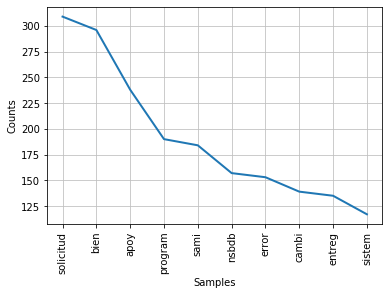

In [27]:
fdist.plot(10)

In [34]:
stopwords = ['solicitud']
for word in list(clean_words):  # iterating on a copy since removing will mess things up
    if word in stopwords:
        clean_words.remove(word)

In [35]:
word_tag_pairs = nltk.bigrams(clean_words)
type(word_tag_pairs)

generator

In [36]:
fdist=FreqDist(word_tag_pairs)
fdist.most_common(20)

[(('nuevo', 'sistema'), 49),
 (('cambio', 'estatus'), 34),
 (('solicita', 'apoyo'), 33),
 (('programación', 'entrega'), 30),
 (('entrega', 'bienes'), 28),
 (('oficios', 'transferencia'), 22),
 (('apoyo', 'verificar'), 21),
 (('programar', 'entregas'), 20),
 (('sami', 'error'), 20),
 (('entregas', 'venta'), 19),
 (('pueden', 'programar'), 19),
 (('cambio', 'fecha'), 19),
 (('apoyo', 'programación'), 17),
 (('sami', 'apoyo'), 16),
 (('transferencia', 'pendiente'), 15),
 (('pendiente', 'reflejarse'), 15),
 (('sistema', 'sami'), 15),
 (('bienes', 'rechazados'), 15),
 (('error', 'caratula'), 14),
 (('fecha', 'programación'), 13)]

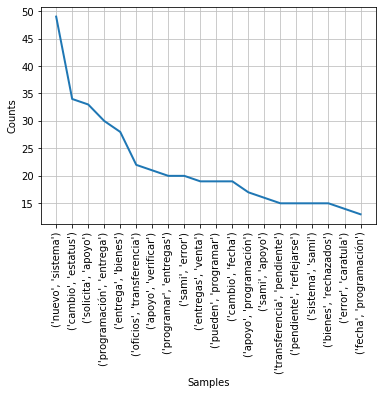

In [37]:
fdist.plot(20)

In [38]:
word_tag_triple = nltk.trigrams(clean_words)
type(word_tag_triple)

generator

In [39]:
fdist=FreqDist(word_tag_triple)
fdist.most_common(20)

[(('programar', 'entregas', 'venta'), 19),
 (('pueden', 'programar', 'entregas'), 18),
 (('oficios', 'transferencia', 'pendiente'), 15),
 (('transferencia', 'pendiente', 'reflejarse'), 15),
 (('apoyo', 'nuevo', 'sistema'), 11),
 (('programación', 'entrega', 'bienes'), 11),
 (('cambio', 'estatus', 'bienes'), 9),
 (('solicita', 'apoyo', 'atender'), 8),
 (('atender', 'aclaración', 'solventada'), 8),
 (('inconsistencia', 'programacion', 'bienes'), 8),
 (('programacion', 'bienes', 'vendidos'), 8),
 (('entrega', 'bienes', 'venta'), 8),
 (('cambio', 'unidad', 'medida'), 7),
 (('apoyo', 'atender', 'aclaración'), 7),
 (('error', 'verificar', 'cumplimiento'), 7),
 (('nueva', 'programación', 'entrega'), 7),
 (('nuevo', 'sistema', 'siab'), 6),
 (('drno', 'pueden', 'programar'), 6),
 (('acceso', 'nuevo', 'sistema'), 6),
 (('cambio', 'fecha', 'programación'), 6)]

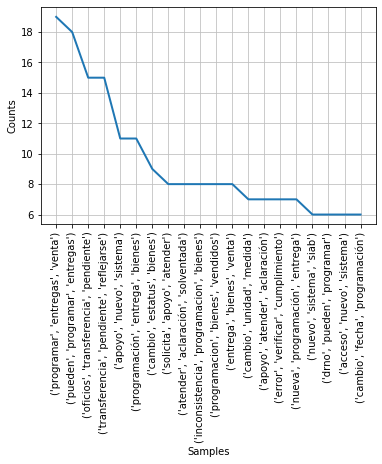

In [40]:
fdist.plot(20)

In [47]:
palabras=clean_words
remover = ['toda','sami','nsbdb']
for word in list(palabras):  # iterating on a copy since removing will mess things up
    if word in remover:
        palabras.remove(word)

In [48]:
fdist=FreqDist(palabras)
fdist.most_common(20)

[('bienes', 237),
 ('programación', 116),
 ('siab', 106),
 ('entrega', 97),
 ('bien', 59),
 ('solicita', 55),
 ('estatus', 53),
 ('solicitudes', 52),
 ('nuevo', 52),
 ('programar', 50),
 ('transferencia', 48),
 ('venta', 44),
 ('oficios', 44),
 ('fecha', 43),
 ('programacion', 43),
 ('visualizar', 39),
 ('tarea', 36),
 ('verificar', 35),
 ('acta', 35),
 ('entregas', 33)]

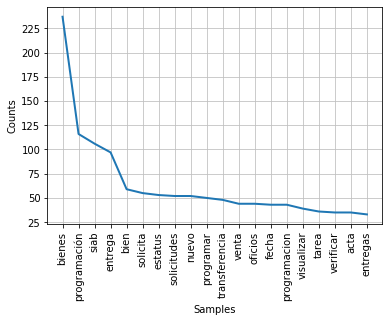

In [49]:
fdist.plot(20)